## Tarea 9.4

Suponga que la medición de un cierto proceso físico da como resultado la siguiente expresión

$$
p(x) = \sin x + n(x)
$$

donde $n$ es el error experimental que podemos describir como un número aleatorio, para cada valor de $x$, tomado de una distribución gaussiana con media $0$ y desviación estándar $10^{-5}$. Queremos calcular la integral

$$
\int_0^1 dx\,p(x)\,.
$$

Use el método compuesto de Simpson para calcular esta integral. El verdadero valor de esta integral es $1-\cos(1)$. Grafique el error cometido en función de $h$. ¿Se puede lograr una precisión de $10^{-7}$? ¿Por qué?

### Solución:

De primera instancia necesitamos definir nuestra función $ p(x) $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
num = 10000
x = np.linspace(0, 1, num)
px = np.sin(x) + np.random.normal(0, 1*10**(-5), num) #error inducido pedido np.random.normal 
px1 = np.sin(x)

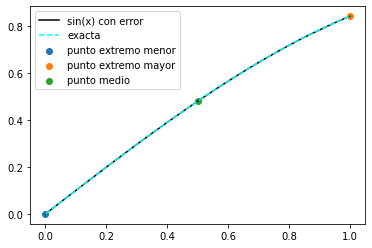

In [2]:
plt.plot(x, px, color= 'black', label ='sin(x) con error')
plt.plot(x, px1, linestyle='--', color='cyan', label ='exacta')
plt.scatter(x[0], px[0], label ='punto extremo menor')
plt.scatter(x[-1], px[-1], label ='punto extremo mayor')
plt.scatter(x[4999], px[4999], label='punto medio')
plt.legend()

Queremos calcular la integral de esta función entre $x \in [0,1]$, para esto ocupamos el método de Simpsons visto en clases

In [3]:
def simpson_uno(fxo, fx1, fx2, h):
    return (h/6)*(fxo + 4*fx1 + fx2)

In [4]:
simp10_M=simpson_uno(px[9999], px[4999], px[0], 1)

La integral de mi funcion $$\int_0^1 dx\,p(x)\, = 1 - \cos(1) + C.$$

In [5]:
exacto=1-np.cos(1)
exacto

0.45969769413186023

In [6]:
simp10_M

0.459824487964991

In [7]:
np.abs(exacto-simp10_M)

0.000126793833130745

Podemos notar que su error esta en el orden de $10^{-4}$, si seguimos ocupando este mismo metodo de simpson pero con mas puntos a considerar el error disminuye.

In [8]:
x01 = np.linspace(0, 1, 10000000)
px01 = np.sin(x01) + np.random.normal(0, 1*10**(-5), 10000000)
simp1000=simpson_uno(px01[9999999], px01[4999999], px01[0], 1)
np.abs(exacto-simp1000)

0.00017354401193125923

No hay mejora con el primer método por lo que tiene un limite de efectividad con respecto al espacio separado.

Generaré un script de fórmula compuesta de Simpsons para analizar si de esta manera considerará mayor precisión.

In [9]:
def simpson_com1(fun, a, b):
    num1 = np.linspace(1, 10000, 10000)
    h=(b-a)/num1 
    I= h*(fun[0] + 4*np.sum(fun[1:-1:2])+2*np.sum(fun[1:-1:2])+ fun[-1])/3
    return I

In [10]:
inte=simpson_com1(px, 0, 1)[9990:]

Podemos ver que el método compuesto no mejora mucho el resultado, y si superamos cierto límite nuestro resultado empieza a empeorar. En este caso el límite es cercano a $\frac{1}{10000}$ de $h$

Podemos apreciar que nuestro error disminuye a medida que consideramos mas puntos a tomar, o sea que vamos tomando espacios más pequeños para disminuir esta diferencia entre la parábola y los "rectangulos" formados.

Graficando el error cometido en funcion de $h:$

In [11]:
exacto=1-np.cos(1)
aber=np.abs(exacto-inte)

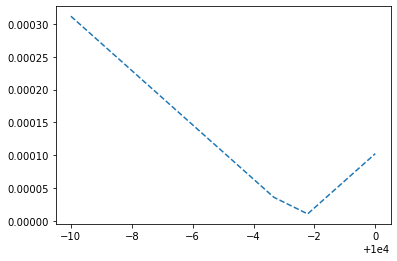

In [12]:
x22=np.linspace(9990, 10000 , 10 )
plt.plot(x22, aber, '--')

Podemos concluir que a partir de este gráfico, que alcanzamos una máxima precisión cuando estamos cerca de las $10000$ secciones, luego de este numero la precisión comienza a disminuir. Por esto mismo la idea de alcanzar una precisión mayor con este método se hace díficil, lo cual nuestra precisión máxima está en el orden de $10^{-5}$.

# Calificación: 6.8

Faltó discutir el origen de este efecto: El método es estable, pero el hay un error constante que no cambia al cambiar $h$. (Ver notas de clase.)